In [2]:
import pandas as pd
mnist=pd.read_csv("mnist_784.csv")
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


# Splitting Data

In [3]:
xtrain,xtest,ytrain,ytest=mnist.iloc[:60000,:-1],mnist.iloc[60000:,:-1],mnist.iloc[:60000,-1],mnist.iloc[60000:,-1]

In [4]:
xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ytrain.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

# Training Data

In [6]:
from sklearn.svm import SVC
svc=SVC(random_state=42)
svc.fit(xtrain,ytrain)

SVC(random_state=42)

# Validating Data

In [11]:
predicted=svc.predict(xtest)

In [53]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(ytest,predicted)
c_df=pd.DataFrame(c)
c_df

,0,1,2,3,4,5,6,7,8,9
0,973,0,1,0,0,2,1,1,2,0
1,0,1126,3,1,0,1,1,1,2,0
2,6,1,1006,2,1,0,2,7,6,1
3,0,0,2,995,0,2,0,5,5,1
4,0,0,5,0,961,0,3,0,2,11
5,2,0,0,9,0,871,4,1,4,1
6,6,2,0,0,2,3,944,0,1,0
7,0,6,11,1,1,0,0,996,2,11
8,3,0,2,6,3,2,2,3,950,3
9,3,4,1,7,10,2,1,7,4,970


#### Plotting Confusion Matrix

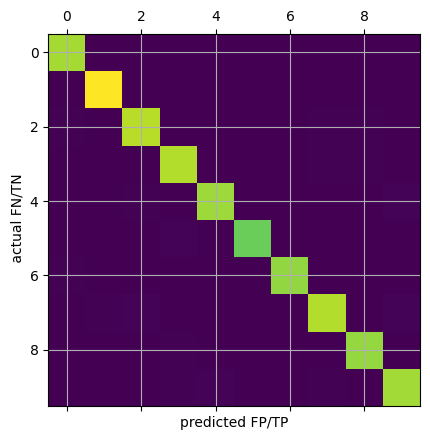

In [100]:
import matplotlib.pyplot as plt 
import numpy as np
plt.matshow(c)
plt.ylabel(" actual FN/TN")
plt.xlabel("predicted FP/TP")
plt.grid(True)

##### Error Analysis

In [54]:
row_sum=c_df.sum(axis=1)
error_c=c_df/row_sum
error_n=error_c.to_numpy()
error_n = error_c.to_numpy()
np.fill_diagonal(error_n, 0)
error = pd.DataFrame(error_n)
error

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000969,0.000000,0.000000,0.002242,0.001044,0.000973,0.002053,0.000000
1,0.000000,0.000000,0.002907,0.000990,0.000000,0.001121,0.001044,0.000973,0.002053,0.000000
2,0.006122,0.000881,0.000000,0.001980,0.001018,0.000000,0.002088,0.006809,0.006160,0.000991
3,0.000000,0.000000,0.001938,0.000000,0.000000,0.002242,0.000000,0.004864,0.005133,0.000991
4,0.000000,0.000000,0.004845,0.000000,0.000000,0.000000,0.003132,0.000000,0.002053,0.010902
5,0.002041,0.000000,0.000000,0.008911,0.000000,0.000000,0.004175,0.000973,0.004107,0.000991
6,0.006122,0.001762,0.000000,0.000000,0.002037,0.003363,0.000000,0.000000,0.001027,0.000000
7,0.000000,0.005286,0.010659,0.000990,0.001018,0.000000,0.000000,0.000000,0.002053,0.010902
8,0.003061,0.000000,0.001938,0.005941,0.003055,0.002242,0.002088,0.002918,0.000000,0.002973
9,0.003061,0.003524,0.000969,0.006931,0.010183,0.002242,0.001044,0.006809,0.004107,0.000000


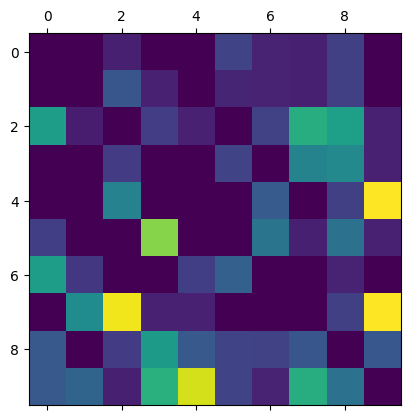

In [56]:
plt.matshow(error)

## evaluating demo

In [57]:
ytrain.iloc[0]

5

In [89]:
xtest_selected = xtest[ytest == 5]
p=svc.predict(xtest_selected)

In [90]:
p

array([6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5,

In [96]:
ytest5=ytest[ytest == 5]
binary_ytest = (ytest5 == 5).astype(int)
c_val = confusion_matrix(ytest5, (p==5).astype(int))
c_val = c_val[1:,:2]
c_val

array([[  0,   0],
       [ 21, 871]], dtype=int64)

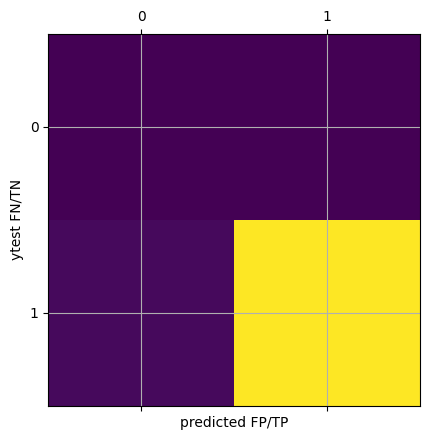

In [99]:
plt.matshow(c_val)
plt.ylabel("ytest FN/TN")
plt.xlabel("predicted FP/TP")
plt.grid(True)

In [164]:
import joblib
joblib.dump(svc, 'model.joblib')

['model.joblib']

# User Input Data

In [250]:
import cv2
import pandas as pd
image = cv2.imread('digit_image.png', cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (28, 28))
#gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
df = pd.DataFrame(resized_image)
df.head()
#pd.DataFrame(df.to_numpy().reshape((1,784)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


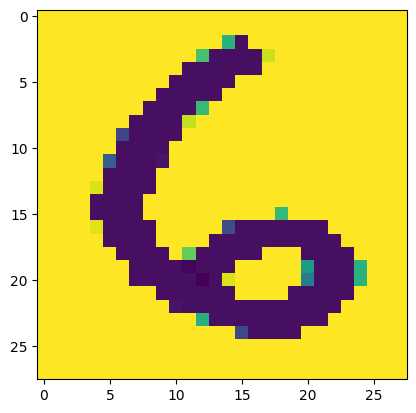

In [251]:
plt.imshow(df) #with pixel of 28 * 28

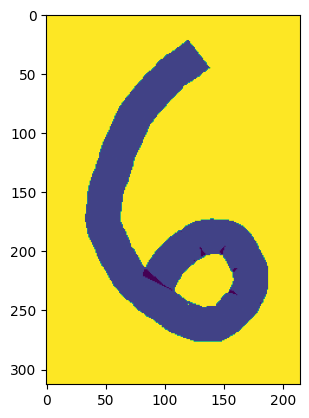

In [252]:
image = cv2.imread('digit_image.png', cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (215, 313))
#gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
df1 = pd.DataFrame(resized_image)
plt.imshow(df1) #with pixel of 28 * 28

In [253]:
loaded_model = joblib.load('model.joblib')

In [254]:
loaded_model.predict([df.to_numpy().flatten()])

C:\Users\hp pavillion\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [229]:
# The predictions of user input are mostly wrong because of compressing img pixels to 28 * 28 leading to loss of data
# The dataset that we are having of pixels 28 * 28 therefore the model is trained on 28 * 28 and hence cannot be trained on higher pixels due to lack of data
#The model gives high accuracy with test data but less precission(because the model is trained in that manner) as test dataset is of 28 * 28